<a href="https://colab.research.google.com/github/YamikaniSita/mw-bootcamp2021-challenges/blob/main/keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras

In [29]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from tensorflow.keras.optimizers import SGD
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np


In [18]:
plot_path = "/content/drive/MyDrive/datasets"
print('[LOADING DATASET]')
dataset = datasets.fetch_openml('mnist_784')
data = dataset.data.astype('float') / 255.0
(xTrain, xTest, yTrain, yTest) = train_test_split(data, dataset.target, test_size=0.25)

[LOADING DATASET]


In [19]:
lb = LabelBinarizer()
yTrain = lb.fit_transform(yTrain)
yTest = lb.transform(yTest)

In [24]:
#define keras model
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [30]:
print('TRAINING')
sgd = SGD(0.01)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
H = model.fit(xTrain, yTrain, validation_data=(xTest, yTest), epochs=100, batch_size=128)


TRAINING
Epoch 1/100
411/411 [==============================] - 8s 14ms/step - loss: 2.2832 - accuracy: 0.1581 - val_loss: 2.2516 - val_accuracy: 0.2161
Epoch 2/100
411/411 [==============================] - 3s 7ms/step - loss: 2.2222 - accuracy: 0.3272 - val_loss: 2.1923 - val_accuracy: 0.5094
Epoch 3/100
411/411 [==============================] - 3s 7ms/step - loss: 2.1535 - accuracy: 0.5108 - val_loss: 2.1129 - val_accuracy: 0.5857
Epoch 4/100
411/411 [==============================] - 3s 8ms/step - loss: 2.0599 - accuracy: 0.6077 - val_loss: 2.0033 - val_accuracy: 0.6115
Epoch 5/100
411/411 [==============================] - 3s 8ms/step - loss: 1.9291 - accuracy: 0.6528 - val_loss: 1.8510 - val_accuracy: 0.6938
Epoch 6/100
411/411 [==============================] - 3s 7ms/step - loss: 1.7567 - accuracy: 0.6891 - val_loss: 1.6619 - val_accuracy: 0.7015
Epoch 7/100
411/411 [==============================] - 3s 8ms/step - loss: 1.5568 - accuracy: 0.7182 - val_loss: 1.4572 - val_accura

In [31]:
print('Evaluation Report')
predictions = model.predict(xTest, batch_size=128)
print(classification_report(yTest.argmax(axis=1), predictions.argmax(axis=1), target_names=[str(x) for x in lb.classes_]))

Evaluation Report
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1695
           1       0.94      0.96      0.95      1940
           2       0.91      0.90      0.91      1758
           3       0.89      0.89      0.89      1733
           4       0.90      0.94      0.92      1718
           5       0.87      0.86      0.87      1564
           6       0.93      0.95      0.94      1762
           7       0.94      0.91      0.93      1843
           8       0.91      0.87      0.89      1731
           9       0.91      0.88      0.89      1756

    accuracy                           0.92     17500
   macro avg       0.91      0.91      0.91     17500
weighted avg       0.92      0.92      0.92     17500



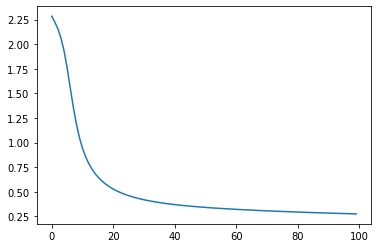

In [39]:
plt.plot(np.arange(0, 100), H.history['loss'], label='losses')
